# Loan Prediction using Machine Learning 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Pre-Processing

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import scipy.cluster.hierarchy as sch
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [ ]:
#Load the data
data = pd.read_csv('/content/drive/My Drive/train.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
# Finding number of null values
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### Imputing null values with mode for categorical variables, mean for continuous variables

In [ ]:
data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [ ]:
data.Gender= data.Gender.fillna(data['Gender'].value_counts().index[0])

In [ ]:
data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [ ]:
data.Married= data.Married.fillna(data['Married'].value_counts().index[0])

In [ ]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:
data.Dependents= data.Dependents.fillna(data['Dependents'].value_counts().index[0])

In [ ]:
data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [ ]:
data.Self_Employed= data.Self_Employed.fillna(data['Self_Employed'].value_counts().index[0])

In [ ]:
data.LoanAmount = data.LoanAmount.fillna(data.LoanAmount.mean())

In [ ]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [ ]:
data.Loan_Amount_Term= data.Loan_Amount_Term.fillna(data['Loan_Amount_Term'].value_counts().index[0])

In [ ]:
data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [ ]:
data.Credit_History= data.Credit_History.fillna(data['Credit_History'].value_counts().index[0])

In [ ]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


### Exploratory Data Analysis(EDA)

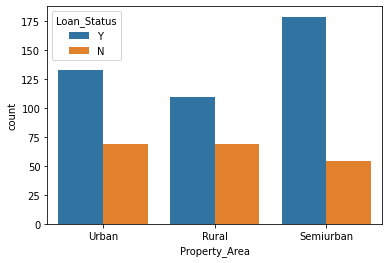

In [ ]:
sns.countplot(x='Property_Area',data=data,hue='Loan_Status')

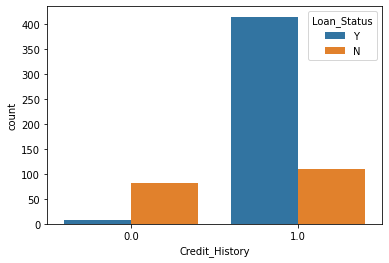

In [ ]:
sns.countplot(x='Credit_History',data=data,hue='Loan_Status')

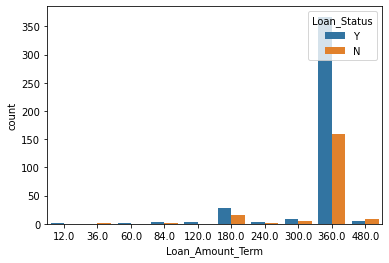

In [ ]:
sns.countplot(x='Loan_Amount_Term',data=data,hue='Loan_Status')

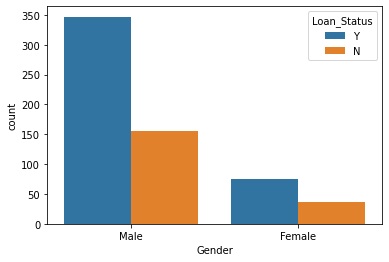

In [ ]:
sns.countplot(x='Gender',data=data,hue='Loan_Status')

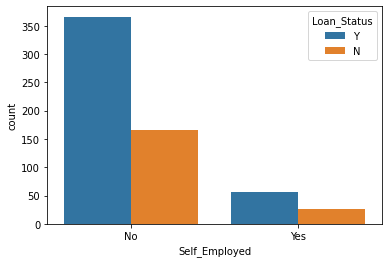

In [ ]:
sns.countplot(x='Self_Employed',data=data,hue='Loan_Status')

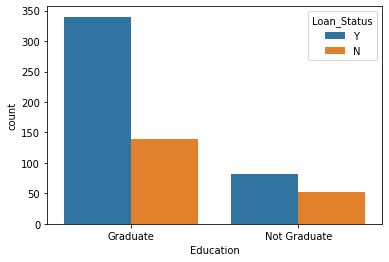

In [ ]:
sns.countplot(x='Education',data=data,hue='Loan_Status')

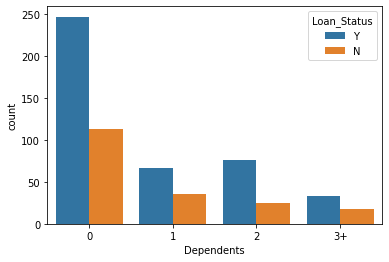

In [ ]:
sns.countplot(x='Dependents',data=data,hue='Loan_Status')

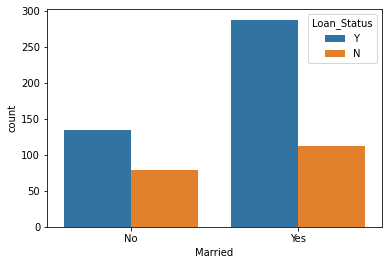

In [ ]:
sns.countplot(x='Married',data=data,hue='Loan_Status')

In [ ]:
# Converting all categorical values to numeric values.
l=LabelEncoder()
data.Gender=l.fit_transform(data.Gender)
data.Married=l.fit_transform(data.Married)
data.Dependents=l.fit_transform(data.Dependents)
data.Education=l.fit_transform(data.Education)
data.Self_Employed=l.fit_transform(data.Self_Employed)
data.Property_Area=l.fit_transform(data.Property_Area)
data.Loan_Status=l.fit_transform(data.Loan_Status)

In [ ]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [ ]:
#Dropping loan id column.
data=data.drop(['Loan_ID'],axis=1)

In [ ]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [ ]:
# Splitting data into Train and Test Set
X=data.iloc[:,0:10]
y=data.iloc[:,11]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
#Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
#Correlation
corr=data.corr()
corr

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100912,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.103864,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.036475,-0.001431,-0.044776,-0.036416
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.036475,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.001431,-0.004705,1.000000,0.001963,0.540556


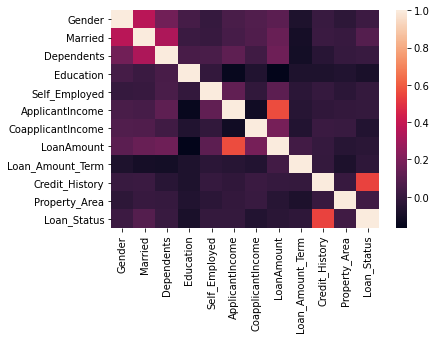

In [ ]:
import seaborn as sns
sns.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns)

## Machine Learning Algorithms

### Linear Regression

In [ ]:
linreg = LinearRegression().fit(X_train, y_train)
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=10,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')
get_cv_scores(linreg)

CV Mean:  0.21859974038205573
STD:  0.16729114358048916




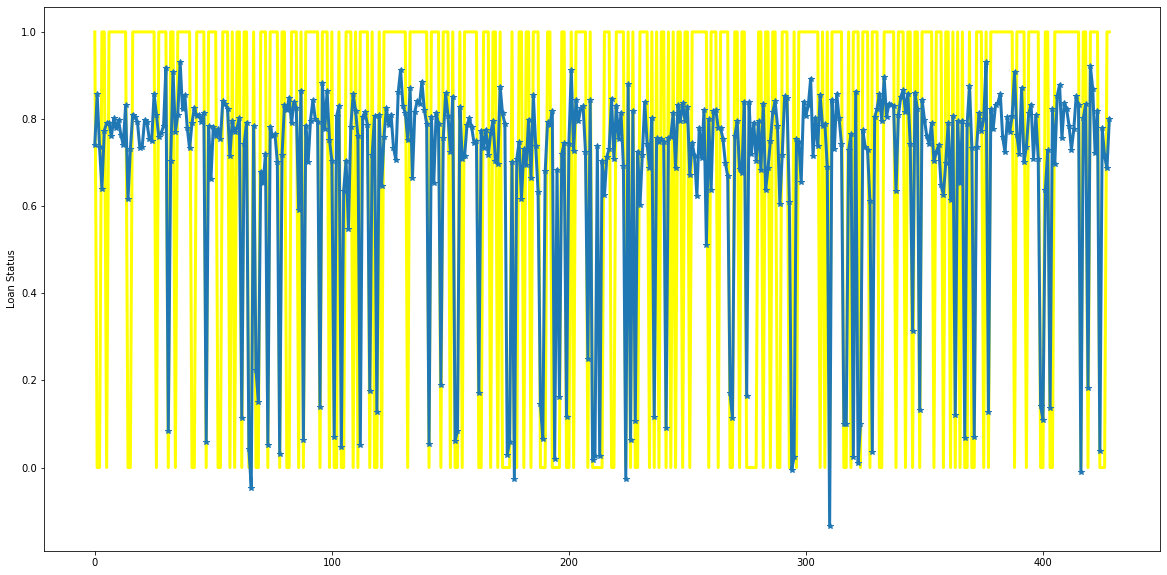

In [ ]:
#for training data
plt.figure(figsize=(20, 10))
plt.plot(range(0, len(y_train)), y_train, color='yellow', linewidth=3)
plt.plot(range(0, len(y_train)), linreg.predict(X_train), marker="*", linewidth=3)
plt.ylabel("Loan Status")
plt.show()

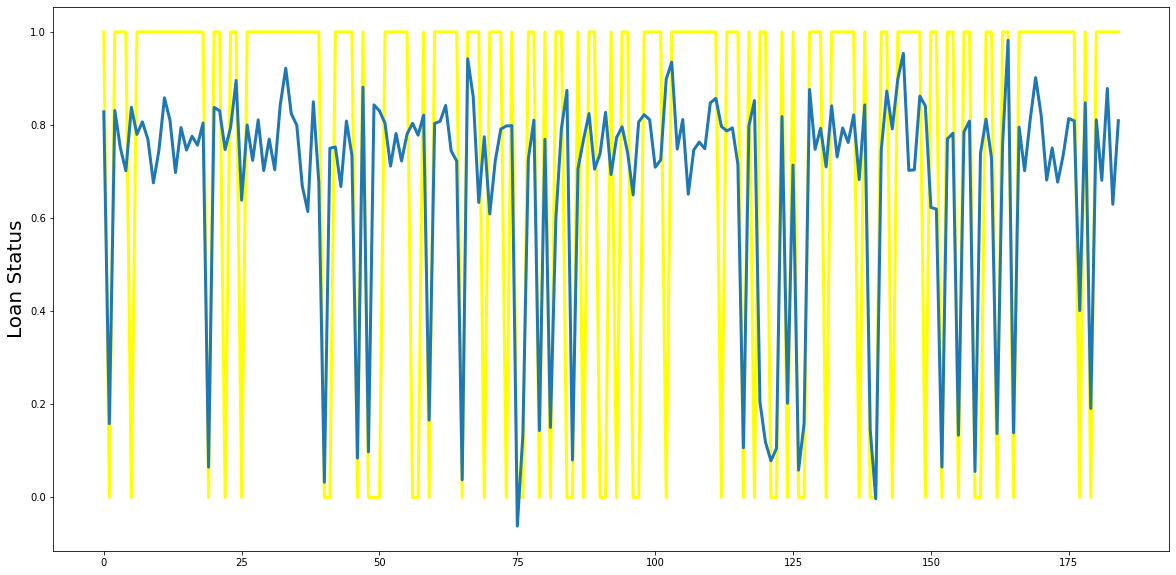

In [ ]:
# For testing data
plt.figure(figsize=(20, 10))
plt.plot(range(0, len(y_test)), y_test, color='yellow', linewidth=3)
plt.plot(range(0, len(y_test)), linreg.predict(X_test), linewidth=3)
plt.ylabel("Loan Status",fontsize=20)
plt.show()

### Ridge Regression

In [ ]:
ridreg = Ridge(alpha=1)
ridreg.fit(X_train, y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [ ]:
y_pred = ridreg.predict(X_test)

In [ ]:
print("MSE on train data: ", mean_squared_error(y_true=y_train, y_pred=ridreg.predict(X_train)))
print("MAE on train data: ", mean_absolute_error(y_true=y_train, y_pred=ridreg.predict(X_train)))
print("R squared on train data: ", ridreg.score(X_train, y_train))

print("MSE on test data: ", mean_squared_error(y_true=y_test, y_pred=ridreg.predict(X_test)))
print("MAE on test data: ", mean_absolute_error(y_true=y_test, y_pred=ridreg.predict(X_test)))
print("R squared on test data: ", ridreg.score(X_test, y_test))

MSE on train data:  0.1566116679223406
MAE on train data:  0.31463013759726544
R squared on train data:  0.28761819139655265
MSE on test data:  0.13299684647821075
MAE on test data:  0.2906915126042403
R squared on test data:  0.3418425288148116


### Ridge Hyperparameter Tuning

In [ ]:
params = {"alpha": [10,15,20,25,30,35,40,45]}
ridreg = Ridge()
clf = GridSearchCV(estimator=ridreg, param_grid=params, cv=10, return_train_score=True)
clf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [10, 15, 20, 25, 30, 35, 40, 45]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [ ]:
clf.best_estimator_

Ridge(alpha=30, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [ ]:
ridreg = Ridge(alpha=30)
ridreg.fit(X_train, y_train)

Ridge(alpha=30, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [ ]:
print("MSE on train data: ", mean_squared_error(y_true=y_train, y_pred=ridreg.predict(X_train)))
print("MAE on train data: ", mean_absolute_error(y_true=y_train, y_pred=ridreg.predict(X_train)))
print("R squared on train data: ", ridreg.score(X_train, y_train))

print("MSE on test data: ", mean_squared_error(y_true=y_test, y_pred=ridreg.predict(X_test)))
print("MAE on test data: ", mean_absolute_error(y_true=y_test, y_pred=ridreg.predict(X_test)))
print("R squared on test data: ", ridreg.score(X_test, y_test))

MSE on train data:  0.15688998830153247
MAE on train data:  0.3218935524816204
R squared on train data:  0.28635219137413914
MSE on test data:  0.1337436664343001
MAE on test data:  0.2987305716058216
R squared on test data:  0.33814676348844397


### Decision Tree

In [ ]:
clf= DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(120.50166083916085, 211.7178947368421, 'X[9] <= -1.025\ngini = 0.44\nsamples = 429\nvalue = [140, 289]'),
 Text(28.095104895104896, 200.2736842105263, 'X[7] <= 4.537\ngini = 0.15\nsamples = 61\nvalue = [56, 5]'),
 Text(23.412587412587413, 188.82947368421054, 'X[6] <= 2.19\ngini = 0.124\nsamples = 60\nvalue = [56, 4]'),
 Text(14.047552447552448, 177.38526315789474, 'X[5] <= -0.136\ngini = 0.098\nsamples = 58\nvalue = [55, 3]'),
 Text(9.365034965034965, 165.94105263157894, 'gini = 0.0\nsamples = 37\nvalue = [37, 0]'),
 Text(18.73006993006993, 165.94105263157894, 'X[5] <= -0.122\ngini = 0.245\nsamples = 21\nvalue = [18, 3]'),
 Text(14.047552447552448, 154.49684210526317, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(23.412587412587413, 154.49684210526317, 'X[5] <= -0.062\ngini = 0.1\nsamples = 19\nvalue = [18, 1]'),
 Text(18.73006993006993, 143.05263157894737, 'X[6] <= -0.315\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(14.047552447552448, 131.60842105263157, 'gini = 0.0\

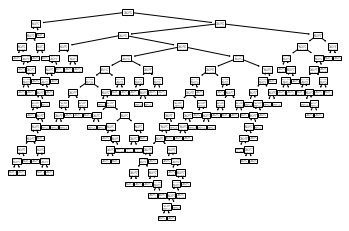

In [ ]:
from sklearn import tree
tree.plot_tree(clf) 

In [ ]:
y_pred= clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6864864864864865

Text(33.0, 0.5, 'Actual')

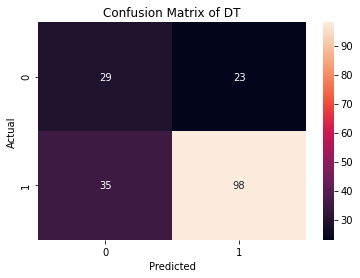

In [ ]:
ConfusionMatrix=confusion_matrix(y_test,y_pred)
sns.heatmap(ConfusionMatrix,annot = True, fmt = "d")
plt.title('Confusion Matrix of DT')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.45      0.56      0.50        52
           1       0.81      0.74      0.77       133

    accuracy                           0.69       185
   macro avg       0.63      0.65      0.64       185
weighted avg       0.71      0.69      0.70       185



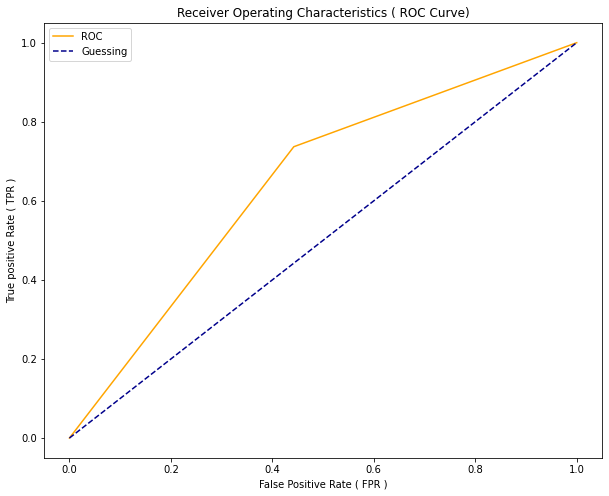

AUC Score : 64.73%


In [ ]:
FPR, TPR, Threshold = roc_curve(y_test,y_pred)
AUC = roc_curve(y_test,y_pred)
def Plot_ROC_Curve(FPR,TPR) :
    plt.figure(figsize = (10, 8))
    # Plot ROC Curve
    plt.plot(FPR, TPR, color = 'orange', label = 'ROC')
    # Plot Line with No Predictive Power (Baseline)
    plt.plot([0,1],[0,1], color = 'darkblue', linestyle = '--', label = 'Guessing')
    # Customize the Plot 
    plt.title('Receiver Operating Characteristics ( ROC Curve)')
    plt.xlabel('False Positive Rate ( FPR )')
    plt.ylabel('True positive Rate ( TPR )')
    plt.legend()
    plt.show()
Plot_ROC_Curve(FPR, TPR)
print(f'AUC Score : {roc_auc_score(y_test,y_pred)*100:.2f}%')

# Decision Tree Hyperparameter Tuning

In [ ]:
param_dist={
      'criterion':['gini', 'entropy'],
    'max_depth':[1,2,3,4,5,6,7,None]
}

In [ ]:
grid = GridSearchCV(clf, param_grid=param_dist, cv=10, n_jobs=-1)
grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                    

In [ ]:
grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
grid.best_score_

0.7926910299003322

In [ ]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 1}

In [ ]:
y_pred = grid.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.8486486486486486

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 26  26]
 [  2 131]]


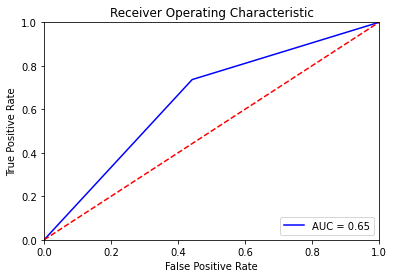

In [ ]:
def plot_roc(model, X_test, y_test):
    # calculate the fpr and tpr for all thresholds of the classification
    probabilities = model.predict_proba(np.array(X_test))
    predictions = probabilities[:, 1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
plot_roc(clf,X_test,y_test)

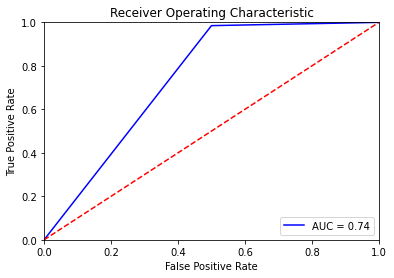

In [ ]:
plot_roc(grid,X_test,y_test)

In [ ]:
tp=cm[0,0]
fn=cm[0,1]
fp=cm[1,0]
tn=cm[1,1]

In [ ]:
recall=(tp/(tp+fn))
print(recall)

0.5


In [ ]:
precision=(tp/(tp+fp))
print(precision)

0.9285714285714286


In [ ]:
f1_score=(2*recall*precision)/(recall+precision)
print(f1_score)

0.65


### Logistic Regression

In [ ]:
# Fitting Logistic Regression to the Training set
logModel = LogisticRegression()
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1])

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 27,  25],
       [  2, 131]])

Text(33.0, 0.5, 'Actual')

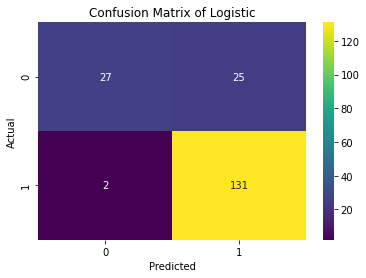

In [ ]:
sns.heatmap(cm, annot = True, fmt = "d", cmap = 'viridis')
plt.title('Confusion Matrix of Logistic')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.52      0.67        52
           1       0.84      0.98      0.91       133

    accuracy                           0.85       185
   macro avg       0.89      0.75      0.79       185
weighted avg       0.87      0.85      0.84       185



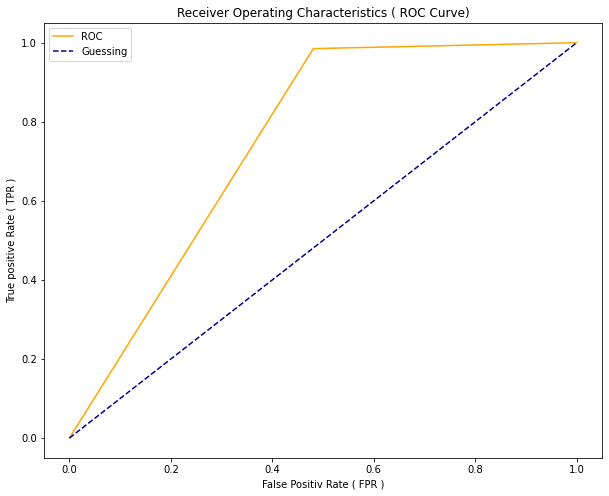

AUC Score : 75.21%


In [ ]:
FPR, TPR, Threshold = roc_curve(y_test, y_pred)
AUC = roc_curve(y_test, y_pred)

def Plot_ROC_Curve(FPR, TPR) :
    
    plt.figure(figsize = (10, 8))
    
    # Plot ROC Curve
    plt.plot(FPR, TPR, color = 'orange', label = 'ROC')
    
    # Plot Line with No Predictive Power (Baseline)
    plt.plot([0,1],[0,1], color = 'darkblue', linestyle = '--', label = 'Guessing')
    
    # Customize the Plot 
    plt.title('Receiver Operating Characteristics ( ROC Curve)')
    plt.xlabel('False Positiv Rate ( FPR )')
    plt.ylabel('True positive Rate ( TPR )')
    plt.legend()
    plt.show()

Plot_ROC_Curve(FPR, TPR)
print(f'AUC Score : {roc_auc_score(y_test, y_pred)*100:.2f}%')

In [ ]:
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(y_test, y_pred))

The accuracy of Logistic Regression is:  0.8540540540540541


### Logistic Hyperparameter Tuning

In [ ]:
logreg = LogisticRegression()

In [ ]:
penalty = ['l1', 'l2']
C = np.logspace(-4,4,20)

In [ ]:
hyperparameters = dict(penalty=penalty, C=C)
clf = GridSearchCV(logreg, hyperparameters, cv=10)
best_clf = clf.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_se

In [ ]:
best_clf.best_estimator_

LogisticRegression(C=0.012742749857031334, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print (f'Accuracy - :{best_clf.score(X_test,y_test)}')

Accuracy - :0.8486486486486486


### KNN

In [ ]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'manhattan', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred2 = classifier.predict(X_test)
y_pred2

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1])

In [ ]:
print(confusion_matrix(y_test, y_pred2))

[[ 26  26]
 [ 12 121]]


In [ ]:
ConfusionMatrix = confusion_matrix(y_pred2,y_test)

Text(33.0, 0.5, 'Actual')

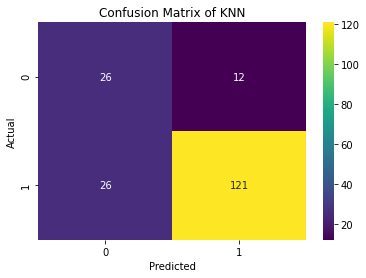

In [ ]:
sns.heatmap(ConfusionMatrix, annot = True, fmt = "d", cmap = 'viridis')
plt.title('Confusion Matrix of KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.68      0.50      0.58        52
           1       0.82      0.91      0.86       133

    accuracy                           0.79       185
   macro avg       0.75      0.70      0.72       185
weighted avg       0.78      0.79      0.78       185



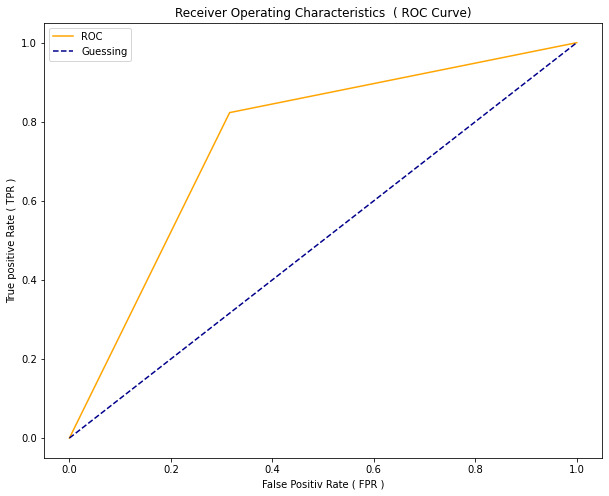

AUC Score : 70.49%


In [ ]:
FPR, TPR, Threshold = roc_curve(y_pred2, y_test)
AUC = roc_curve(y_pred, y_test)

def Plot_ROC_Curve(FPR, TPR) :
    
    plt.figure(figsize = (10, 8))
    
    # Plot ROC Curve
    plt.plot(FPR, TPR, color = 'orange', label = 'ROC')
    
    # Plot Line with No Predictive Power (Baseline)
    plt.plot([0,1],[0,1], color = 'darkblue', linestyle = '--', label = 'Guessing')
    
    # Customize the Plot 
    plt.title('Receiver Operating Characteristics  ( ROC Curve)')
    plt.xlabel('False Positiv Rate ( FPR )')
    plt.ylabel('True positive Rate ( TPR )')
    plt.legend()
    plt.show()

Plot_ROC_Curve(FPR, TPR)
print(f'AUC Score : {roc_auc_score(y_test, y_pred2)*100:.2f}%')

In [ ]:
print('The accuracy of KNN is: ', metrics.accuracy_score(y_pred2, y_test))

The accuracy of KNN is:  0.7945945945945946


# KNN Hyperparameter tuning

In [ ]:
rf_params = {
    'n_neighbors': [2, 3, 5,10,15,20],
}

In [ ]:
clf = KNeighborsClassifier()
grid = GridSearchCV(clf, rf_params, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [2, 3, 5, 10, 15, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
print(grid.best_params_)

{'n_neighbors': 15}


In [ ]:
print("Accuracy:"+ str(grid.best_score_))

Accuracy:0.787878787878788


### SVM

In [ ]:
svc=SVC(kernel='rbf',C=0.1,gamma='auto',random_state = 0)
svc.fit(X_train, y_train)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
ypred_svc=svc.predict(X_test)

In [ ]:
print(classification_report(y_test, ypred_svc))

              precision    recall  f1-score   support

           0       0.92      0.46      0.62        52
           1       0.82      0.98      0.90       133

    accuracy                           0.84       185
   macro avg       0.87      0.72      0.76       185
weighted avg       0.85      0.84      0.82       185



In [ ]:
print('Accuracy:', metrics.accuracy_score(y_test,ypred_svc)*100)

Accuracy: 83.78378378378379


In [ ]:
cm=confusion_matrix(y_test, ypred_svc)
cm

array([[ 24,  28],
       [  2, 131]])

Text(33.0, 0.5, 'Actual')

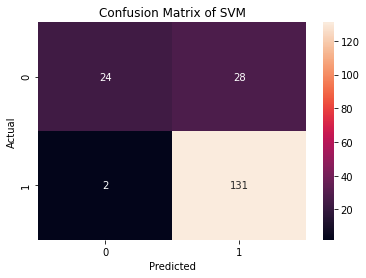

In [ ]:
ConfusionMatrix=confusion_matrix(y_test,ypred_svc)
sns.heatmap(ConfusionMatrix,annot = True, fmt = "d")
plt.title('Confusion Matrix of SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')

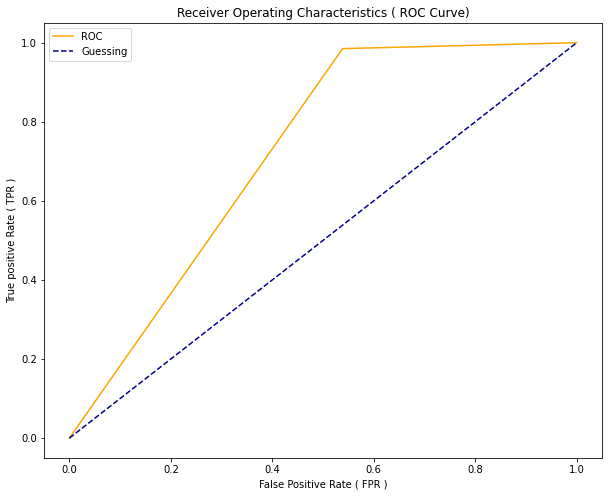

AUC Score : 72.33%


In [ ]:
FPR,TPR,Threshold=roc_curve(y_test,ypred_svc)
AUC=roc_curve(y_test,ypred_svc)
def Plot_ROC_Curve(FPR,TPR) :
    plt.figure(figsize = (10, 8))
    # Plot ROC Curve
    plt.plot(FPR, TPR,color ='orange', label = 'ROC')
    # Plot Line with No Predictive Power (Baseline)
    plt.plot([0,1],[0,1], color = 'darkblue', linestyle = '--', label = 'Guessing')
    # Customize the Plot 
    plt.title('Receiver Operating Characteristics ( ROC Curve)')
    plt.xlabel('False Positive Rate ( FPR )')
    plt.ylabel('True positive Rate ( TPR )')
    plt.legend()
    plt.show()
Plot_ROC_Curve(FPR, TPR)
print(f'AUC Score : {roc_auc_score(y_test, ypred_svc)*100:.2f}%')

### SVM Hyperparameter Tuning

In [ ]:
# USING GRIDSEARCH
svm=GridSearchCV(svm.SVC(gamma='auto'),{
  'C':[0.1,1,10,20],
 'kernel':['rbf','linear','poly']
},cv=3, return_train_score=False)
svm.fit(X_train,y_train)
svm.cv_results_

{'mean_fit_time': array([0.00473976, 0.00156228, 0.00370224, 0.00466537, 0.00205199,
        0.00274022, 0.00433326, 0.0072221 , 0.00391372, 0.00487232,
        0.00891693, 0.00372084]),
 'mean_score_time': array([0.001755  , 0.00064723, 0.0021414 , 0.00158095, 0.0006357 ,
        0.00075094, 0.00122468, 0.00129668, 0.00075126, 0.00125162,
        0.00078901, 0.00073099]),
 'mean_test_score': array([0.71095571, 0.79254079, 0.74125874, 0.7972028 , 0.79254079,
        0.78321678, 0.73892774, 0.79254079, 0.72960373, 0.71328671,
        0.79254079, 0.71561772]),
 'param_C': masked_array(data=[0.1, 0.1, 0.1, 1, 1, 1, 10, 10, 10, 20, 20, 20],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'poly', 'rbf', 'linear', 'poly',
                    'rbf', 'linear', 'poly', 'rbf', 'linear', 'poly'],
              mask=[F

In [ ]:
svm.best_params_

{'C': 1, 'kernel': 'rbf'}

In [ ]:
acc_svm=f'Accuracy: {svm.score(X_test,y_test)*100:.2f}%'

In [ ]:
acc_svm

'Accuracy: 81.62%'

In [ ]:
ypred_svm=svm.predict(X_test)
ypred_svm

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1])

In [ ]:
print(classification_report(y_test,ypred_svm))

              precision    recall  f1-score   support

           0       0.76      0.50      0.60        52
           1       0.83      0.94      0.88       133

    accuracy                           0.82       185
   macro avg       0.80      0.72      0.74       185
weighted avg       0.81      0.82      0.80       185



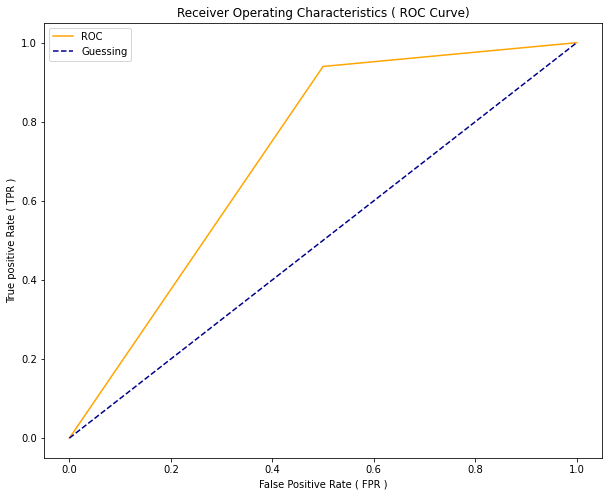

AUC Score : 71.99%


In [ ]:
FPR, TPR, Threshold = roc_curve(y_test,ypred_svm)
AUC = roc_curve(y_test,ypred_svm)
def Plot_ROC_Curve(FPR,TPR) :
    plt.figure(figsize = (10, 8))
    # Plot ROC Curve
    plt.plot(FPR, TPR, color = 'orange', label = 'ROC')
    # Plot Line with No Predictive Power (Baseline)
    plt.plot([0,1],[0,1], color = 'darkblue', linestyle = '--', label = 'Guessing')
    # Customize the Plot 
    plt.title('Receiver Operating Characteristics ( ROC Curve)')
    plt.xlabel('False Positive Rate ( FPR )')
    plt.ylabel('True positive Rate ( TPR )')
    plt.legend()
    plt.show()
Plot_ROC_Curve(FPR, TPR)
print(f'AUC Score : {roc_auc_score(y_test,ypred_svm)*100:.2f}%')

### Random Forest

In [ ]:
r_f = RandomForestClassifier(n_estimators = 100, criterion = 'entropy',oob_score=True)
r_f.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
ypred_r_f=r_f.predict(X_test)
ypred_r_f

array([1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1])

In [ ]:
print('Accuracy:', metrics.accuracy_score(y_test,ypred_r_f)*100)

Accuracy: 76.75675675675676


In [ ]:
print(confusion_matrix(y_test, ypred_r_f))

[[ 27  25]
 [ 18 115]]


Text(33.0, 0.5, 'Actual')

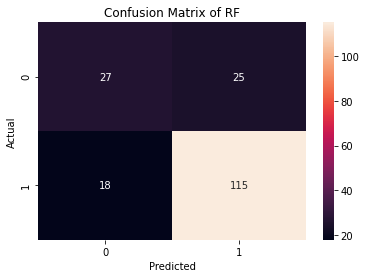

In [ ]:
ConfusionMatrix=confusion_matrix(y_test,ypred_r_f)
sns.heatmap(ConfusionMatrix,annot = True, fmt = "d")
plt.title('Confusion Matrix of RF')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
print(classification_report(y_test,ypred_r_f))

              precision    recall  f1-score   support

           0       0.60      0.52      0.56        52
           1       0.82      0.86      0.84       133

    accuracy                           0.77       185
   macro avg       0.71      0.69      0.70       185
weighted avg       0.76      0.77      0.76       185



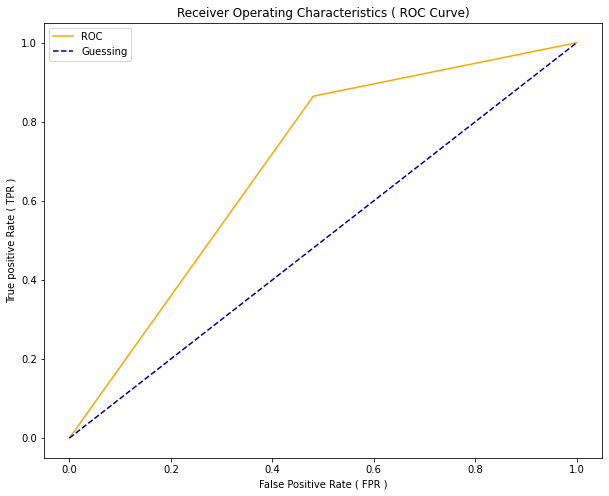

AUC Score : 69.19%


In [ ]:
FPR,TPR,Threshold=roc_curve(y_test, ypred_r_f)
AUC=roc_curve(y_test, ypred_r_f)
def Plot_ROC_Curve(FPR, TPR) :
    plt.figure(figsize = (10, 8))
    # Plot ROC Curve
    plt.plot(FPR, TPR, color = 'orange', label = 'ROC')
    # Plot Line with No Predictive Power (Baseline)
    plt.plot([0,1],[0,1], color = 'darkblue', linestyle = '--', label = 'Guessing')
    # Customize the Plot 
    plt.title('Receiver Operating Characteristics ( ROC Curve)')
    plt.xlabel('False Positive Rate ( FPR )')
    plt.ylabel('True positive Rate ( TPR )')
    plt.legend()
    plt.show()

Plot_ROC_Curve(FPR, TPR)
print(f'AUC Score : {roc_auc_score(y_test, ypred_r_f)*100:.2f}%')

In [ ]:
feature_imp = pd.Series(r_f.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

ApplicantIncome      0.240931
LoanAmount           0.225348
Credit_History       0.198782
CoapplicantIncome    0.128037
Dependents           0.056990
Loan_Amount_Term     0.048713
Married              0.029246
Education            0.025973
Self_Employed        0.024279
Gender               0.021700
dtype: float64

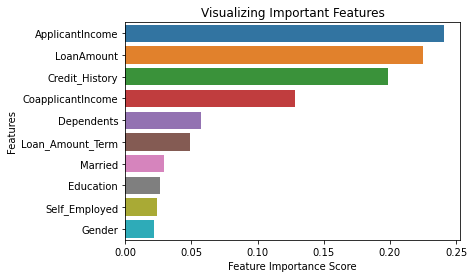

In [ ]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [ ]:
print('OOB Score:',(r_f.oob_score_)*100)

OOB Score: 77.85547785547784


### RF Hyperparameter Tuning

In [ ]:
n_estimators=[int(x) for x in np.linspace(start=10,stop=120,num=10)]
max_features=['auto','sqrt']
max_depth=[5,6]
min_samples_split=[2,5]
min_samples_leaf=[1,2]
bootstrap=[True,False]

In [ ]:
param_grid={'n_estimators':n_estimators, 'max_features':max_features, 'max_depth': max_depth,'min_samples_split':min_samples_split,
           'min_samples_leaf':min_samples_leaf,'bootstrap':bootstrap}
print(param_grid)

{'n_estimators': [10, 22, 34, 46, 58, 71, 83, 95, 107, 120], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 6], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [ ]:
from sklearn.model_selection import GridSearchCV
rf=GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_grid,cv=3,verbose=2,n_jobs=4)

In [ ]:
rf.fit(X_train,y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:    5.6s
[Parallel(n_jobs=4)]: Done 174 tasks      | elapsed:   16.0s
[Parallel(n_jobs=4)]: Done 377 tasks      | elapsed:   33.2s
[Parallel(n_jobs=4)]: Done 660 tasks      | elapsed:   54.9s
[Parallel(n_jobs=4)]: Done 960 out of 960 | elapsed:  1.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
rf.best_params_

{'bootstrap': True,
 'max_depth': 6,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 22}

In [ ]:
print(f'Train Accuracy: {rf.score(X_train,y_train)*100:.2f}')
print(f'Test Accuracy: {rf.score(X_test,y_test)*100:.2f}')

Train Accuracy: 82.28
Test Accuracy: 84.32


In [ ]:
ypred_rf=rf.predict(X_test)
cm=confusion_matrix(y_test,ypred_rf)
print(cm)

[[ 27  25]
 [  4 129]]


Text(33.0, 0.5, 'Actual')

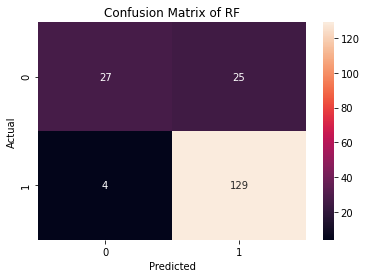

In [ ]:
ConfusionMatrix=confusion_matrix(y_test,ypred_rf)
sns.heatmap(ConfusionMatrix,annot = True, fmt = "d")
plt.title('Confusion Matrix of RF')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
print(classification_report(y_test,ypred_rf))

              precision    recall  f1-score   support

           0       0.87      0.52      0.65        52
           1       0.84      0.97      0.90       133

    accuracy                           0.84       185
   macro avg       0.85      0.74      0.77       185
weighted avg       0.85      0.84      0.83       185



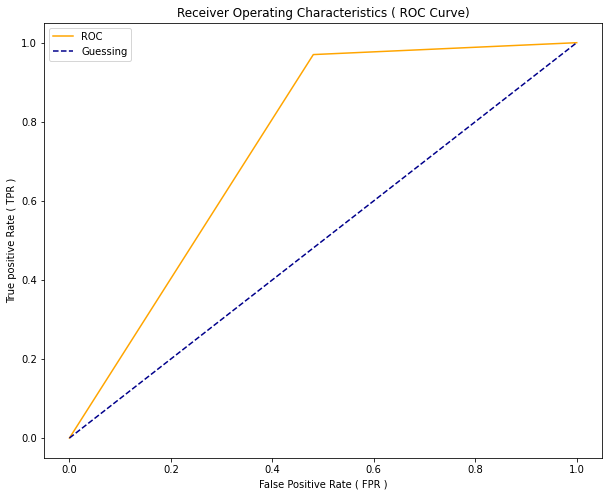

AUC Score : 74.46%


In [ ]:
FPR,TPR,Threshold=roc_curve(y_test, ypred_rf)
AUC=roc_curve(y_test, ypred_rf)
def Plot_ROC_Curve(FPR, TPR) :
    plt.figure(figsize = (10, 8))
    # Plot ROC Curve
    plt.plot(FPR, TPR, color = 'orange', label = 'ROC')
    # Plot Line with No Predictive Power (Baseline)
    plt.plot([0,1],[0,1], color = 'darkblue', linestyle = '--', label = 'Guessing')
    # Customize the Plot 
    plt.title('Receiver Operating Characteristics ( ROC Curve)')
    plt.xlabel('False Positive Rate ( FPR )')
    plt.ylabel('True positive Rate ( TPR )')
    plt.legend()
    plt.show()

Plot_ROC_Curve(FPR, TPR)
print(f'AUC Score : {roc_auc_score(y_test, ypred_rf)*100:.2f}%')

## Naive Bayes

In [ ]:
nb= GaussianNB(var_smoothing=1)
nb.fit(X_train, y_train)
ypred_n_b=nb.predict(X_test)

In [ ]:
print('Accuracy:',metrics.accuracy_score(y_test,ypred_n_b)*100)

Accuracy: 84.86486486486487


In [ ]:
print(confusion_matrix(y_test, ypred_n_b))

[[ 27  25]
 [  3 130]]


Text(33.0, 0.5, 'Actual')

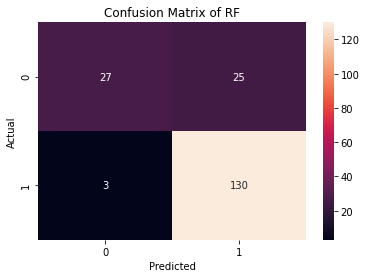

In [ ]:
ConfusionMatrix=confusion_matrix(y_test,ypred_n_b)
sns.heatmap(ConfusionMatrix,annot = True, fmt = "d")
plt.title('Confusion Matrix of RF')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
print(classification_report(y_test,ypred_n_b))

              precision    recall  f1-score   support

           0       0.90      0.52      0.66        52
           1       0.84      0.98      0.90       133

    accuracy                           0.85       185
   macro avg       0.87      0.75      0.78       185
weighted avg       0.86      0.85      0.83       185



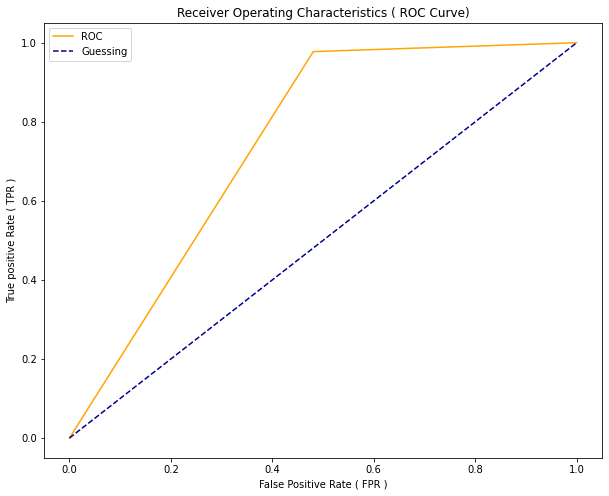

AUC Score : 74.83%


In [ ]:
FPR,TPR,Threshold=roc_curve(y_test,ypred_n_b)
AUC=roc_curve(y_test,ypred_n_b)
def Plot_ROC_Curve(FPR,TPR) :
    plt.figure(figsize = (10, 8))
    # Plot ROC Curve
    plt.plot(FPR, TPR,color ='orange', label = 'ROC')
    # Plot Line with No Predictive Power (Baseline)
    plt.plot([0,1],[0,1], color = 'darkblue', linestyle = '--', label = 'Guessing')
    # Customize the Plot 
    plt.title('Receiver Operating Characteristics ( ROC Curve)')
    plt.xlabel('False Positive Rate ( FPR )')
    plt.ylabel('True positive Rate ( TPR )')
    plt.legend()
    plt.show()
Plot_ROC_Curve(FPR, TPR)
print(f'AUC Score : {roc_auc_score(y_test, ypred_n_b)*100:.2f}%')

In [ ]:
nb.get_params(deep=True)

{'priors': None, 'var_smoothing': 1}

### NB Hyperparameter Tuning

In [ ]:
nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
nb_c = GridSearchCV(estimator=nb_classifier, 
                     param_grid=params_NB, 
                     cv=3,
                     verbose=1, 
                     scoring='accuracy')

nb_c.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.5s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=GaussianNB(priors=None, var_smoothing=1e-09),
             iid='deprecated', n_jobs=None,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.5...
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [ ]:
nb_c.best_params_

{'var_smoothing': 0.657933224657568}

In [ ]:
ypred_nb=nb_c.predict(X_test)
print('Accuracy:',metrics.accuracy_score(y_test,ypred_nb)*100)

Accuracy: 84.86486486486487


In [ ]:
cm=confusion_matrix(y_test,ypred_nb)
print(cm)

[[ 27  25]
 [  3 130]]


Text(33.0, 0.5, 'Actual')

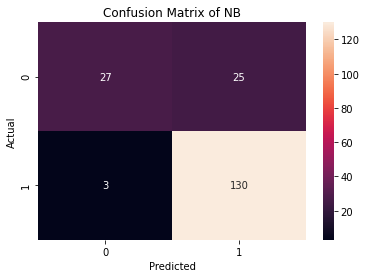

In [ ]:
ConfusionMatrix=confusion_matrix(y_test,ypred_nb)
sns.heatmap(ConfusionMatrix,annot = True, fmt = "d")
plt.title('Confusion Matrix of NB')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
print(classification_report(y_test,ypred_nb))

              precision    recall  f1-score   support

           0       0.90      0.52      0.66        52
           1       0.84      0.98      0.90       133

    accuracy                           0.85       185
   macro avg       0.87      0.75      0.78       185
weighted avg       0.86      0.85      0.83       185



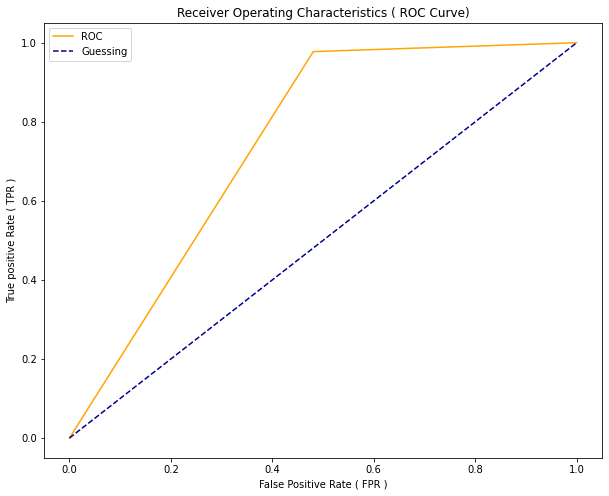

AUC Score : 74.83%


In [ ]:
FPR,TPR,Threshold=roc_curve(y_test,ypred_nb)
AUC=roc_curve(y_test,ypred_nb)
def Plot_ROC_Curve(FPR,TPR) :
    plt.figure(figsize = (10, 8))
    # Plot ROC Curve
    plt.plot(FPR, TPR,color ='orange', label = 'ROC')
    # Plot Line with No Predictive Power (Baseline)
    plt.plot([0,1],[0,1], color = 'darkblue', linestyle = '--', label = 'Guessing')
    # Customize the Plot 
    plt.title('Receiver Operating Characteristics ( ROC Curve)')
    plt.xlabel('False Positive Rate ( FPR )')
    plt.ylabel('True positive Rate ( TPR )')
    plt.legend()
    plt.show()
Plot_ROC_Curve(FPR, TPR)
print(f'AUC Score : {roc_auc_score(y_test, ypred_nb)*100:.2f}%')

### Clustering Algorithms

### Hierarchical Clustering

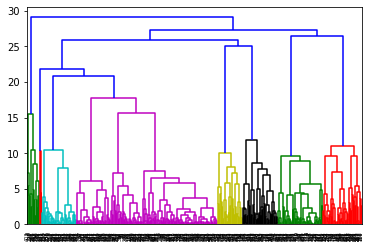

In [ ]:
hc_w=sch.dendrogram(sch.linkage(X_train,method='ward'))
plt.show()

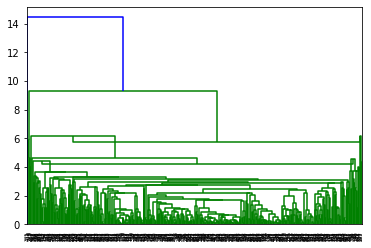

In [ ]:
hc_c=sch.dendrogram(sch.linkage(X_train,method='centroid'))
plt.show()

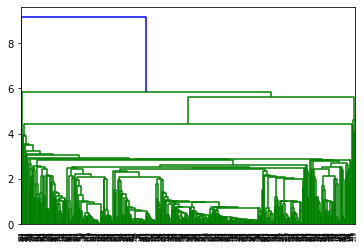

In [ ]:
hc_s=sch.dendrogram(sch.linkage(X_train,method='single'))
plt.show()

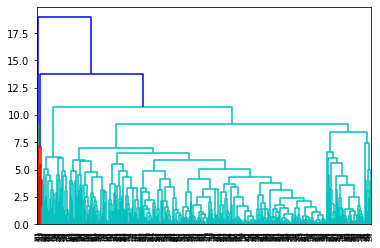

In [ ]:
hc_co=sch.dendrogram(sch.linkage(X_train,method='complete'))
plt.show()

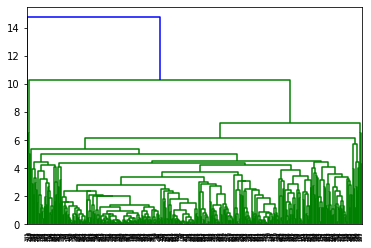

In [ ]:
hc_a=sch.dendrogram(sch.linkage(X_train,method='average'))
plt.show()

### Agglomerative Clustering

In [ ]:
acs=AgglomerativeClustering(n_clusters=5,affinity='manhattan',linkage='single')
ypred_acs=acs.fit_predict(X_train)
ypred_acs

array([1, 1, 1, 0, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [ ]:
acc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='complete')
ypred_acc=acs.fit_predict(X_train)
ypred_acc

array([1, 1, 1, 0, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,

### KMeans

In [ ]:
k=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(X)
    k.append(kmeans.inertia_)
k

[28133349854.697285,
 14330385550.641861,
 9335872334.059631,
 6346837991.421669,
 4912365177.378813,
 3660262505.4132423,
 2820125845.789416,
 2383082244.4660535,
 1956874150.1738987,
 1659458388.0651293]

Text(0.5, 1.0, 'The Elbow Method')

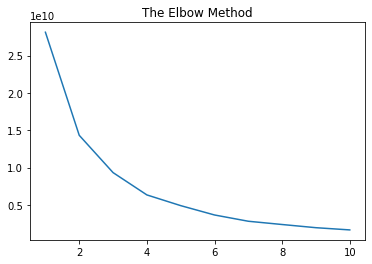

In [ ]:
plt.plot(range(1,11),k)
plt.title('The Elbow Method')

From n_clusters=4, we will get optimal clusters. As from k=4, curve is increasing.

In [ ]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=0)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

### Boosting Algorithms

### AdaBoost

In [ ]:
ab= AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy',max_depth=1),n_estimators=200,learning_rate=1)
ab.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

In [ ]:
ypred_ab=ab.predict(X_test)
ypred_ab

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1])

In [ ]:
print('Accuracy:', metrics.accuracy_score(y_test,ypred_ab)*100)

Accuracy: 72.43243243243244


In [ ]:
print(confusion_matrix(y_test, ypred_ab))

[[ 27  25]
 [ 26 107]]


Text(33.0, 0.5, 'Actual')

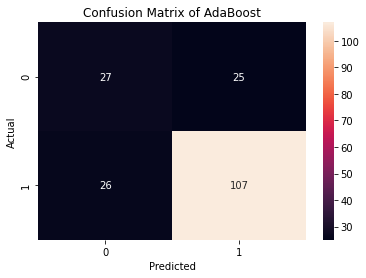

In [ ]:
ConfusionMatrix=confusion_matrix(y_test,ypred_ab)
sns.heatmap(ConfusionMatrix,annot = True, fmt = "d")
plt.title('Confusion Matrix of AdaBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
print(classification_report(y_test,ypred_ab))

              precision    recall  f1-score   support

           0       0.51      0.52      0.51        52
           1       0.81      0.80      0.81       133

    accuracy                           0.72       185
   macro avg       0.66      0.66      0.66       185
weighted avg       0.73      0.72      0.73       185



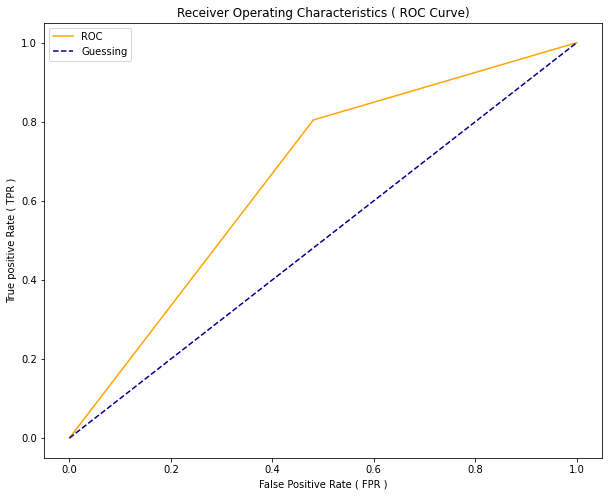

AUC Score : 66.19%


In [ ]:
FPR,TPR,Threshold=roc_curve(y_test,ypred_ab)
AUC=roc_curve(y_test,ypred_ab)
def Plot_ROC_Curve(FPR,TPR) :
    plt.figure(figsize = (10, 8))
    # Plot ROC Curve
    plt.plot(FPR, TPR,color ='orange', label = 'ROC')
    # Plot Line with No Predictive Power (Baseline)
    plt.plot([0,1],[0,1], color = 'darkblue', linestyle = '--', label = 'Guessing')
    # Customize the Plot 
    plt.title('Receiver Operating Characteristics ( ROC Curve)')
    plt.xlabel('False Positive Rate ( FPR )')
    plt.ylabel('True positive Rate ( TPR )')
    plt.legend()
    plt.show()
Plot_ROC_Curve(FPR, TPR)
print(f'AUC Score : {roc_auc_score(y_test, ypred_ab)*100:.2f}%')

### AdaBoost Hyperparameter Tuning

In [ ]:
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [1, 2]
             }

In [ ]:
dt=DecisionTreeClassifier(random_state = 11, max_features = "auto",max_depth = 1)
abc=GridSearchCV(AdaBoostClassifier(base_estimator = dt), param_grid=param_grid, scoring = 'accuracy')

In [ ]:
abc.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=1,
                                                                                max_features='auto',
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_leaf=1,

In [ ]:
abc.best_params_

{'base_estimator__criterion': 'gini',
 'base_estimator__splitter': 'best',
 'n_estimators': 2}

In [ ]:
ypred_abc=abc.predict(X_test)
ypred_abc

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1])

In [ ]:
print('Accuracy:',metrics.accuracy_score(y_test,ypred_abc)*100)

Accuracy: 85.4054054054054


In [ ]:
print(confusion_matrix(y_test, ypred_abc))

[[ 27  25]
 [  2 131]]


Text(33.0, 0.5, 'Actual')

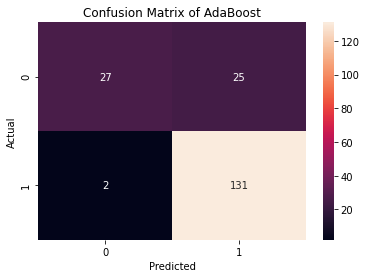

In [ ]:
ConfusionMatrix=confusion_matrix(y_test,ypred_abc)
sns.heatmap(ConfusionMatrix,annot = True, fmt = "d")
plt.title('Confusion Matrix of AdaBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
print(classification_report(y_test,ypred_abc))

              precision    recall  f1-score   support

           0       0.93      0.52      0.67        52
           1       0.84      0.98      0.91       133

    accuracy                           0.85       185
   macro avg       0.89      0.75      0.79       185
weighted avg       0.87      0.85      0.84       185



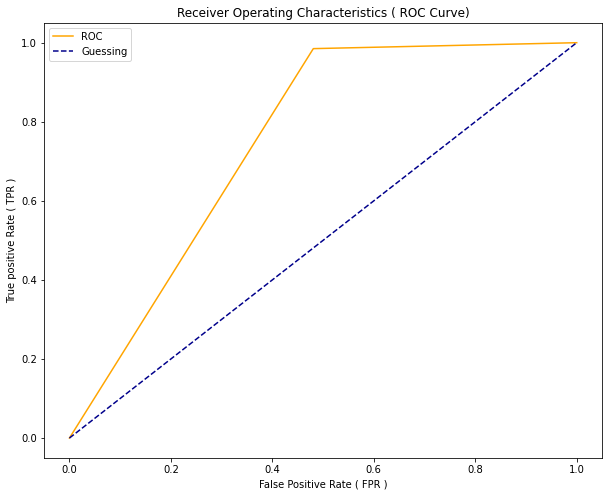

AUC Score : 75.21%


In [ ]:
FPR,TPR,Threshold=roc_curve(y_test,ypred_abc)
AUC=roc_curve(y_test,ypred_abc)
def Plot_ROC_Curve(FPR,TPR) :
    plt.figure(figsize = (10, 8))
    # Plot ROC Curve
    plt.plot(FPR, TPR,color ='orange', label = 'ROC')
    # Plot Line with No Predictive Power (Baseline)
    plt.plot([0,1],[0,1], color = 'darkblue', linestyle = '--', label = 'Guessing')
    # Customize the Plot 
    plt.title('Receiver Operating Characteristics ( ROC Curve)')
    plt.xlabel('False Positive Rate ( FPR )')
    plt.ylabel('True positive Rate ( TPR )')
    plt.legend()
    plt.show()
Plot_ROC_Curve(FPR, TPR)
print(f'AUC Score : {roc_auc_score(y_test, ypred_abc)*100:.2f}%')

### XG Boost

In [ ]:
from xgboost.sklearn import XGBClassifier
xgboost = XGBClassifier(max_depth=2,n_estimators=100,learning_rate=0.01)
xgboost.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
ypred_xg=xgboost.predict(X_test)
ypred_xg

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1])

In [ ]:
print('Accuracy:', metrics.accuracy_score(y_test,ypred_xg)*100)

Accuracy: 84.86486486486487


In [ ]:
print(confusion_matrix(y_test, ypred_xg))

[[ 26  26]
 [  2 131]]


Text(33.0, 0.5, 'Actual')

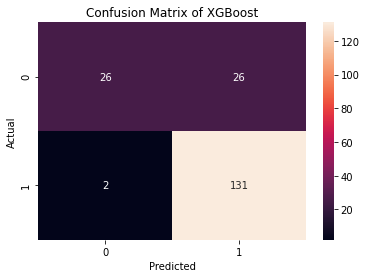

In [ ]:
ConfusionMatrix=confusion_matrix(y_test,ypred_xg)
sns.heatmap(ConfusionMatrix,annot = True, fmt = "d")
plt.title('Confusion Matrix of XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
print(classification_report(y_test,ypred_xg))

              precision    recall  f1-score   support

           0       0.93      0.50      0.65        52
           1       0.83      0.98      0.90       133

    accuracy                           0.85       185
   macro avg       0.88      0.74      0.78       185
weighted avg       0.86      0.85      0.83       185



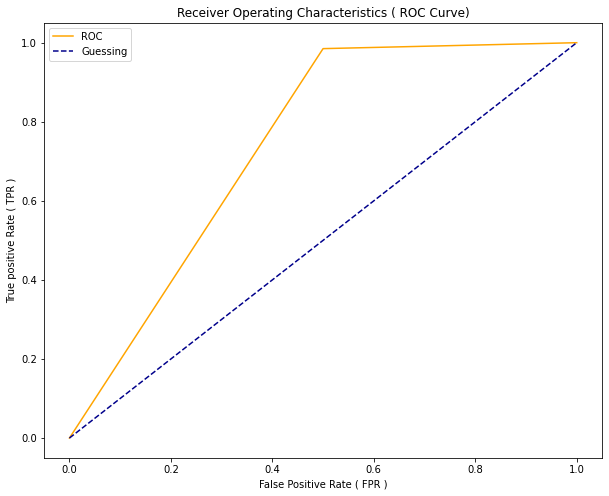

AUC Score : 74.25%


In [ ]:
FPR,TPR,Threshold=roc_curve(y_test,ypred_xg)
AUC=roc_curve(y_test,ypred_xg)
def Plot_ROC_Curve(FPR,TPR) :
    plt.figure(figsize = (10, 8))
    # Plot ROC Curve
    plt.plot(FPR, TPR,color ='orange', label = 'ROC')
    # Plot Line with No Predictive Power (Baseline)
    plt.plot([0,1],[0,1], color = 'darkblue', linestyle = '--', label = 'Guessing')
    # Customize the Plot 
    plt.title('Receiver Operating Characteristics ( ROC Curve)')
    plt.xlabel('False Positive Rate ( FPR )')
    plt.ylabel('True positive Rate ( TPR )')
    plt.legend()
    plt.show()
Plot_ROC_Curve(FPR, TPR)
print(f'AUC Score : {roc_auc_score(y_test, ypred_xg)*100:.2f}%')

### Gradient Boosting

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
ypred_gb=gb.predict(X_test)
ypred_gb

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1])

In [ ]:
print('Accuracy:', metrics.accuracy_score(y_test,ypred_gb)*100)

Accuracy: 78.37837837837837


In [ ]:
print(confusion_matrix(y_test, ypred_gb))

[[ 27  25]
 [ 15 118]]


Text(33.0, 0.5, 'Actual')

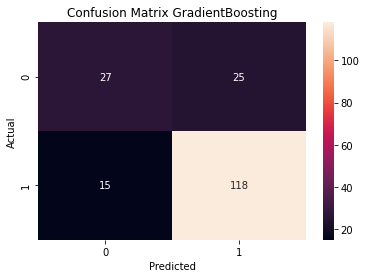

In [ ]:
ConfusionMatrix=confusion_matrix(y_test,ypred_gb)
sns.heatmap(ConfusionMatrix,annot = True, fmt = "d")
plt.title('Confusion Matrix GradientBoosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
print(classification_report(y_test,ypred_gb))

              precision    recall  f1-score   support

           0       0.64      0.52      0.57        52
           1       0.83      0.89      0.86       133

    accuracy                           0.78       185
   macro avg       0.73      0.70      0.71       185
weighted avg       0.77      0.78      0.78       185



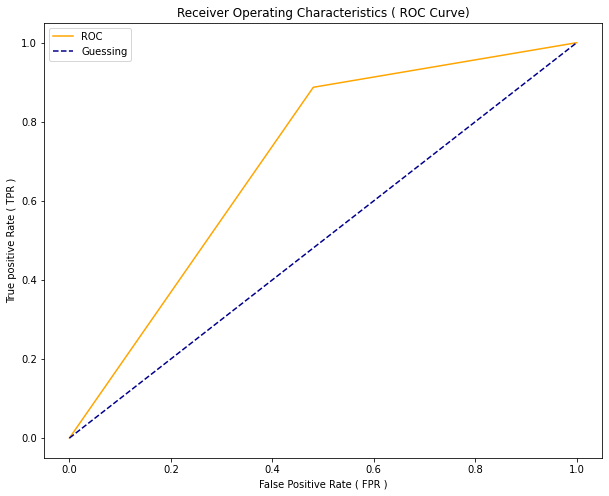

AUC Score : 70.32%


In [ ]:
FPR,TPR,Threshold=roc_curve(y_test,ypred_gb)
AUC=roc_curve(y_test,ypred_gb)
def Plot_ROC_Curve(FPR,TPR) :
    plt.figure(figsize = (10, 8))
    # Plot ROC Curve
    plt.plot(FPR, TPR,color ='orange', label = 'ROC')
    # Plot Line with No Predictive Power (Baseline)
    plt.plot([0,1],[0,1], color = 'darkblue', linestyle = '--', label = 'Guessing')
    # Customize the Plot 
    plt.title('Receiver Operating Characteristics ( ROC Curve)')
    plt.xlabel('False Positive Rate ( FPR )')
    plt.ylabel('True positive Rate ( TPR )')
    plt.legend()
    plt.show()
Plot_ROC_Curve(FPR, TPR)
print(f'AUC Score : {roc_auc_score(y_test, ypred_gb)*100:.2f}%')

### PCA

In [ ]:
pca=PCA(n_components=2)
X_train=pca.fit_transform(X_train)
x_test=pca.transform(X_test)
pca.explained_variance_ratio_

array([0.192076  , 0.14916854])